In [1]:
import nltk

In [2]:
from wordcloud import WordCloud

In [3]:
from nltk.tokenize import word_tokenize

In [6]:
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import numpy as np

In [29]:
from nltk.corpus import stopwords

In [8]:
from nltk.stem import PorterStemmer

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
df_aws_review=pd.read_csv("d:/csv-ml/sentiment/K8 Reviews v0.2.csv")

In [11]:
df_aws_review.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [12]:
#cleaning the text or preprocessing

In [14]:
import string

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
words=[]
for i in df_aws_review["review"]:
    words.append(word_tokenize(i))
    
    

In [24]:
#removed digits and punctuation
word_token=[]
for i in df_aws_review["review"]:
    word_token.append(RegexpTokenizer('[a-z|A-Z]+').tokenize(i))

In [26]:
len(word_token)

14675

In [31]:
word_clean=[]

for i in word_token:
    word_clean_row=[]
    for j in i:
        if j not in stopwords.words("English"):
            word_clean_row.append(j)
    word_clean.append(word_clean_row)
            

In [33]:
#converting the text into lower case
word_lower_row=[]
word_lower=[]
for i in word_clean:
    word_lower_row=[]
    for j in i:
        word_lower_row.append(j.lower())
    word_lower.append(word_lower_row)


In [35]:
#stemming
word_stem_row=[]
word_stem=[]
for i in word_lower:
    word_stem_row=[]
    for j in i:
        word_stem_row.append(PorterStemmer().stem(j))
    word_stem.append(word_stem_row)

In [37]:
#lemmatization
word_lemma_row=[]
word_lemma=[]
for i in word_lower:
    word_lemma_row=[]
    for j in i:
        word_lemma_row.append(WordNetLemmatizer().lemmatize(j))
    word_lemma.append(word_lemma_row)
        

In [40]:
#apply pos tagging

word_tag=[]
for i in word_lemma:
    word_tag.append(nltk.pos_tag(i))
   

In [42]:
#for understanding the context filter the nouns

In [49]:
filtered_tag=[]
for i in word_tag:
    filtered_row=[]
    for j in i:
        if j[1].startswith("NN"):
            filtered_row.append(j[0])
    filtered_tag.append(filtered_row)
        

In [51]:
#generate a word cloud
words=[]
for i in filtered_tag:
    for j in i:
        words.append(j)
    

In [53]:
word_str=','.join(words)

In [58]:
wc= WordCloud(background_color="black", max_words=10000, contour_width=3, contour_color='steelblue')

In [59]:
from wordcloud import WordCloud
wc.generate(word_str)

In [60]:
import matplotlib.pyplot as plt

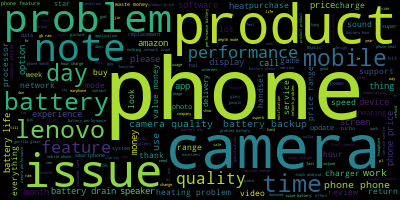

<Figure size 3600x3600 with 0 Axes>

In [62]:
plt.figure(figsize=(50,50))
wc.to_image()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
str_list=[]
for i in filtered_tag:
    str_list.append(','.join(i))
    
    

In [67]:
v1=CountVectorizer().fit(str_list)

In [1]:
#v1.get_feature_names()

In [69]:
v2=v1.transform(str_list)

In [70]:
v2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
x_tr,x_test,y_tr,y_test=train_test_split(v2,df_aws_review["sentiment"],test_size=.2)

In [75]:
nb_mod=MultinomialNB().fit(x_tr,y_tr)

In [76]:
p=nb_mod.predict(x_test)

In [77]:
p

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,p)

0.7165247018739352